In [20]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rfpimp import *

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target
df = pd.DataFrame(X,columns = cancer.feature_names)

In [4]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']
df = df[features] #select just these features
print("target[0:30] = ",y[0:30])
df.head(30)

target[0:30] =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


radius error  texture error  concave points error  symmetry error  \
0         1.0950         0.9053              0.015870         0.03003   
1         0.5435         0.7339              0.013400         0.01389   
2         0.7456         0.7869              0.020580         0.02250   
3         0.4956         1.1560              0.018670         0.05963   
4         0.7572         0.7813              0.018850         0.01756   
5         0.3345         0.8902              0.011370         0.02165   
6         0.4467         0.7732              0.010390         0.01369   
7         0.5835         1.3770              0.014480         0.01486   
8         0.3063         1.0020              0.012260         0.02143   
9         0.2976         1.5990              0.014320         0.01789   
10        0.3795         1.1870              0.007591         0.01460   
11        0.5058         0.9849              0.012820         0.02008   
12        0.9555         3.5680              0.040900         0.04484   
13        0.4033         1.0780              0.019920         0.02981   
14        0.2121         1.1690              0.016280         0.01961   
15        0.3700         1.0330              0.010900         0.01857   
16        0.4727         1.2400              0.011090         0.01410   
17        0.5692         1.0730              0.012970         0.01689   
18        0.7582         1.0170              0.015210         0.01356   
19        0.2699         0.7886              0.013150         0.01980   
20        0.1852         0.7477              0.006490         0.01678   
21        0.2773         0.9768              0.014210         0.02027   
22        0.4388         0.7096              0.022520         0.03672   
23        0.6917         1.1270              0.010380         0.01083   
24        0.8068         0.9017              0.011300         0.01468   
25        1.0460         0.9760              0.023970         0.02308   
26        0.2545         0.9832              0.013520         0.01454   
27        0.8529         1.8490              0.019110         0.02293   
28        0.4390         1.0120              0.010830         0.01768   
29        0.6003         0.8225              0.013540         0.01925   

    worst texture  worst smoothness  worst symmetry  
0           17.33            0.1622          0.4601  
1           23.41            0.1238          0.2750  
2           25.53            0.1444          0.3613  
3           26.50            0.2098          0.6638  
4           16.67            0.1374          0.2364  
5           23.75            0.1791          0.3985  
6           27.66            0.1442          0.3063  
7           28.14            0.1654          0.3196  
8           30.73            0.1703          0.4378  
9           40.68            0.1853          0.4366  
10          33.88            0.1181          0.2948  
11          27.28            0.1396          0.3792  
12          29.94            0.1037          0.3176  
13          27.66            0.1131          0.2809  
14          32.01            0.1651          0.3596  
15          37.13            0.1678          0.4218  
16          30.88            0.1464          0.3029  
17          31.48            0.1789          0.3706  
18          30.88            0.1512          0.2768  
19          19.26            0.1440          0.2977  
20          20.49            0.1312          0.3184  
21          15.66            0.1324          0.2450  
22          19.08            0.1390          0.4667  
23          35.59            0.1401          0.2822  
24          31.56            0.1805          0.3613  
25          21.40            0.1545          0.4066  
26          33.21            0.1525          0.4264  
27          27.26            0.1338          0.2341  
28          36.71            0.1641          0.4027  
29          19.52            0.1255          0.2756

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.15)

In [19]:
cl = RandomForestClassifier(n_estimators = 300)
cl.fit(X_train,y_train)
validation_e = cl.score(X_test,y_test)
print(f"{validation_e*100:.2f}% correct")

94.19% correct


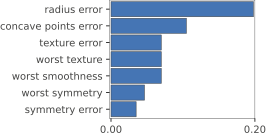

In [22]:
I = importances(cl, X_test, y_test)
plot_importances(I, color = '#4575b4', vscale = 1.4)